# Introduction

    The sales data available to us is divided into 12 (Jan-Dec) csv files for the year 2019.
    In this project we try to answer the following points :
    
    1) What was the best month for sales? How much money was earned in that months?
    2) What city had the highest number of sales?
    3) At what time should we display advertisements to maximize the liklihood of customer's buying product?
    4) What are the products that are most often sold together?
    5) What product was sold the most? Any insights would be appreciated..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading and Cleaning the DataSet

In [2]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
raw_data = pd.DataFrame()
for i in months:
    df = pd.read_csv('/home/shreyas/GITHUB PROFILE/NUMPY, PANDAS, AND VIS/Sales_Data/Sales_'+i+'_2019.csv')
    raw_data = pd.concat([raw_data,df],ignore_index=True)
    
raw_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [3]:
raw_data.dropna(inplace=True)

### Great! Now that we have all 12 months data stored in raw_data, we can proceed ...

#####   --> To begin with let's check the data types of all attributes

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##### As we can see, all the datatypes are of object type. We need to convert them into relevant datatypes before we can start with our analysis.



In [5]:
try:
    raw_data['Order ID'] = pd.to_numeric(raw_data['Order ID'])
except ValueError as e:
    print(e)

Unable to parse string "Order ID" at position 1069


In [6]:
raw_data.loc[1073]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 1073, dtype: object

##### This shows us that our data needs to be cleaned as while reading the csv_files, some values have stored the name of the  Columns as well

In [7]:
raw_data.loc[raw_data['Order ID']== 'Order ID']  # There are about 355 rows with faulty data..lets drop them first

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
clean1_data = raw_data.loc[raw_data['Order ID']!= 'Order ID']
clean1_data.loc[clean1_data['Order ID']=='Order ID'] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Now that we have somwhat cleaned the data, Let's try converting the data types  :

In [9]:
clean1_data['Order ID'] = pd.to_numeric(clean1_data['Order ID'])
clean1_data['Quantity Ordered'] = pd.to_numeric(clean1_data['Quantity Ordered'])
clean1_data['Price Each'] = pd.to_numeric(clean1_data['Price Each'])

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

### As I would be working only with month, day, and hour I will extract them separately..

In [10]:
clean1_data['Month'] = clean1_data['Order Date'].str.split(pat='/',expand=True)[0]
clean1_data['Day'] = clean1_data['Order Date'].str.split(pat='/',expand=True)[1]
clean1_data['Time'] = clean1_data['Order Date'].str.split(expand=True)[1]
clean1_data['Hour'] = clean1_data['Time'].str.split(pat=':',expand=True)[0]
clean1_data.drop(columns = ['Order Date','Time'],inplace=True)

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [11]:
clean1_data['Month'] = pd.to_numeric(clean1_data['Month'])
clean1_data['Day'] = pd.to_numeric(clean1_data['Day'])
clean1_data['Hour'] = pd.to_numeric(clean1_data['Hour'])

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

##### In the next block of code, I am adding a new column - Total = Quantity Ordered * Price Each

In [12]:
clean1_data['Total'] = clean1_data['Quantity Ordered'] * clean1_data['Price Each']

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
clean1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Month             185950 non-null  int64  
 6   Day               185950 non-null  int64  
 7   Hour              185950 non-null  int64  
 8   Total             185950 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 14.2+ MB


In [14]:
clean1_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Day,Hour,Total
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",1,22,21,700.00
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",1,28,14,14.95
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",1,17,13,23.98
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",1,5,20,149.99
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",1,25,11,11.99


##### Next I will extract the Address, City, State, Pin from Purchase Address

In [15]:
clean1_data['Address'] = clean1_data['Purchase Address'].str.split(pat=', ',expand=True)[0]
clean1_data['City'] = clean1_data['Purchase Address'].str.split(pat=', ',expand=True)[1]
clean1_data['State_Pin'] = clean1_data['Purchase Address'].str.split(pat=', ',expand=True)[2]
clean1_data['State'] = clean1_data['State_Pin'].str.split(expand=True)[0]
clean1_data['Pin'] = clean1_data['State_Pin'].str.split(expand=True)[1]
clean1_data.drop(columns=['Purchase Address','State_Pin'],inplace=True)

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

# Now let's explore the questions that are mentioned in the Introduction

## 1) What was the best month for sales? How much money was earned in that months?



In [16]:
month_wise_total=clean1_data.groupby('Month')['Total'].sum()
month_wise_total.sort_values(ascending=False,inplace=True)
month_wise_total

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Total, dtype: float64

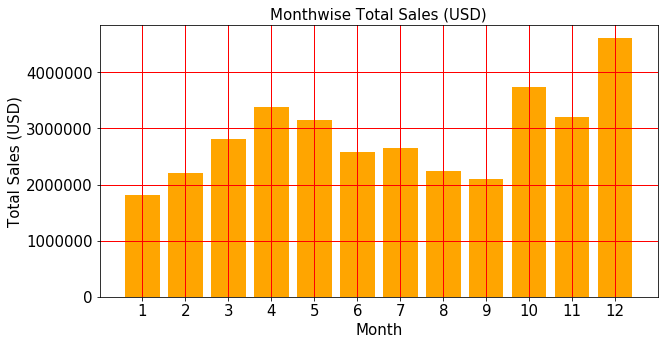

In [17]:
x = month_wise_total.index
y = month_wise_total.values
fig = plt.figure(figsize = (10, 5))
plt.bar(x,y, color='orange')
plt.title('Monthwise Total Sales (USD)',size=15)
plt.xlabel('Month',size=15)
plt.ylabel('Total Sales (USD)',size=15)
plt.xticks(x,size=15)
plt.yticks(size=15)

plt.grid(b=True,which='both',axis='both',color='r', linestyle='-', linewidth=1)
plt.show()

#### We see that the total sales in December (4.6 million USD) clearly leads in terms of Monthwise Total Sales and the worst month for total sales was January recording only 1.82 million USD

## 2) What city had the highest number of sales?

In [18]:
city_group = clean1_data.groupby('City')['Total'].sum()
city_group.sort_values(ascending=False, inplace=True)
city_group

City
San Francisco    8.262204e+06
Los Angeles      5.452571e+06
New York City    4.664317e+06
Boston           3.661642e+06
Atlanta          2.795499e+06
Dallas           2.767975e+06
Seattle          2.747755e+06
Portland         2.320491e+06
Austin           1.819582e+06
Name: Total, dtype: float64

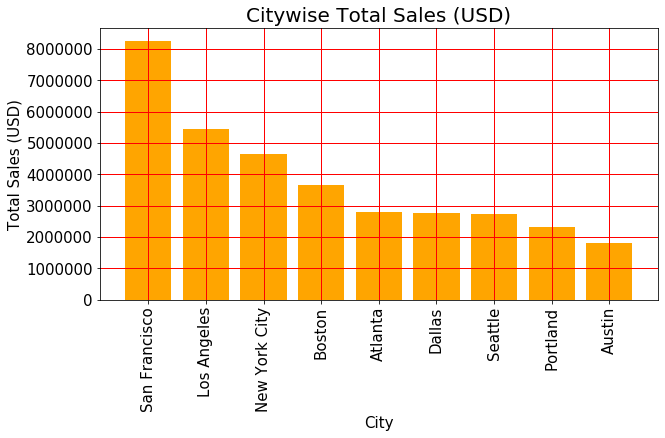

In [19]:
x = city_group.index
y = city_group.values
fig = plt.figure(figsize = (10, 5))
plt.bar(x,y, color='orange')
plt.xticks(x,rotation='vertical',size=15)
plt.yticks(size=15)
plt.title('Citywise Total Sales (USD)',size=20)
plt.xlabel('City',size=15)
plt.ylabel('Total Sales (USD)',size=15)
plt.grid(b=True,which='both',axis='both',color='r', linestyle='-', linewidth=1)
plt.show()

#### The above results show that people of San Francisco ordered the most amounting to over 8.2 million $

## 3) At what time should we display advertisements to maximize the liklihood of customer's buying product?

    --> Since we donot have the footfall attribute, we will use Number of Orders as the substitute

In [20]:
hour_group = clean1_data.groupby(['Hour'])['Quantity Ordered'].count()
hour_group

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

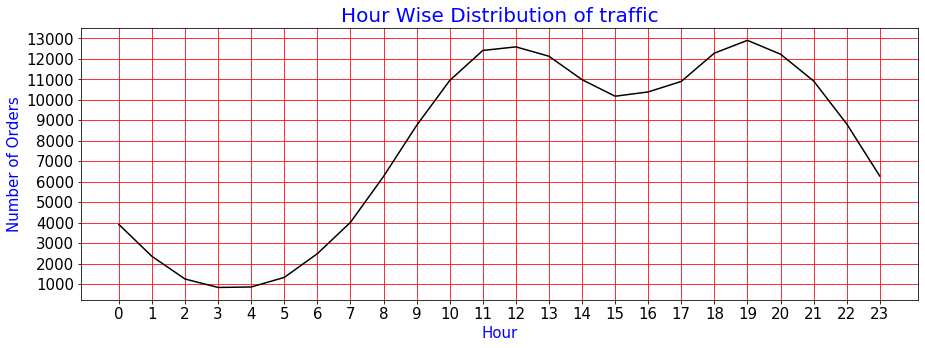

In [21]:
fig = plt.figure(figsize=(15,5))
plt.plot(hour_group.index, hour_group.values, color='black')
plt.title('Hour Wise Distribution of traffic',size=20, color='blue')
plt.grid(b=True, which='both',axis='both',color='r')
plt.xticks(np.arange(0,24),size= 15)
plt.yticks(np.arange(1000,14000, step=1000),size= 15)
plt.xlabel('Hour',size='15', color='blue')
plt.ylabel('Number of Orders', size=15, color='Blue')
plt.show()

### If we look at the big picture, the best time for displaying advertisements is 10:00 AM to 09:00 PM. Anually this period recorded a range of 12130 - 12900 (approx) orders annually. If we want to dive a little bit deeper into the data, we could  apply the same operation monthwise instead of the complete year

    Here I have operated for January alone!

In [22]:
Jan_hour_group = clean1_data[clean1_data['Month']==1].groupby(['Hour'])['Quantity Ordered'].count()
Jan_hour_group.sort_values(ascending=False, inplace=True)
Jan_hour_group  

Hour
12    670
19    657
11    655
18    635
20    620
13    607
10    598
21    576
16    554
15    545
14    542
17    508
9     493
22    455
23    375
8     324
0     219
7     179
6     137
1     120
2      80
5      75
4      48
3      37
Name: Quantity Ordered, dtype: int64

## 4) What are the products that are most often sold together?

In [23]:
clean1_data

,Order ID,Product,Quantity Ordered,Price Each,Month,Day,Hour,Total,Address,City,State,Pin
0,141234,iPhone,1,700.00,1,22,21,700.00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,1,28,14,14.95,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,1,17,13,23.98,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,1,5,20,149.99,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,1,25,11,11.99,387 10th St,Austin,TX,73301
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12,11,20,14.95,14 Madison St,San Francisco,CA,94016
186846,319667,AA Batteries (4-pack),2,3.84,12,1,12,7.68,549 Willow St,Los Angeles,CA,90001
186847,319668,Vareebadd Phone,1,400.00,12,9,6,400.00,273 Wilson St,Seattle,WA,98101
186848,319669,Wired Headphones,1,11.99,12,3,10,11.99,778 River St,Dallas,TX,75001


In [24]:
duplicated_Order_Id = clean1_data[clean1_data['Order ID'].duplicated(keep=False)]
duplicated_Order_Id.shape

(14649, 12)

### The above piece of code shows us the Order ID with multiple product orders
### We will now append a new column in our Duplicated_Order_Id data frame that will contain the list of products that were bought together

In [25]:
duplicated_Order_Id['Product(s)'] = duplicated_Order_Id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

/home/shreyas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
duplicated_Order_Id.head()

,Order ID,Product,Quantity Ordered,Price Each,Month,Day,Hour,Total,Address,City,State,Pin,Product(s)
41,141275,USB-C Charging Cable,1,11.95,1,7,16,11.95,610 Walnut St,Austin,TX,73301,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,1,7,16,11.99,610 Walnut St,Austin,TX,73301,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,1,2,8,150.00,4 1st St,Los Angeles,CA,90001,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,1,2,8,11.52,4 1st St,Los Angeles,CA,90001,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,1,10,11,400.00,20 Dogwood St,New York City,NY,10001,"Vareebadd Phone, Wired Headphones"


### Now we can delete all the duplicate Order _IDs; Also we will only take Order_Id Column and Product(s) column as none of the other columns make sense for this question...

In [27]:
duplicated_Order_Id = duplicated_Order_Id[['Order ID','Product(s)']].drop_duplicates()
duplicated_Order_Id

,Order ID,Product(s)
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop, Wired Headphones"
186731,319556,"Google Phone, Wired Headphones"
186760,319584,"iPhone, Wired Headphones"
186773,319596,"iPhone, Lightning Charging Cable"


### The next snippet of code was referenced from
https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

In [72]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated_Order_Id['Product(s)']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,2)))  # 2 here results in pairs of products...

product1= np.array([])
product2= np.array([])
frq = np.array([])

for key, value in count.most_common(10):
    
    product1 = np.append(product1,key[0])
    product2 = np.append(product2,key[1])
    frq = np.append(frq,value)  
    
two_product_bought_together = pd.DataFrame({'Product_1':product1,'Product_2':product2,'Number of times bought together':frq},index=np.arange(1,11))
two_product_bought_together

,Product_1,Product_2,Number of times bought together
1,iPhone,Lightning Charging Cable,1005.0
2,Google Phone,USB-C Charging Cable,987.0
3,iPhone,Wired Headphones,447.0
4,Google Phone,Wired Headphones,414.0
5,Vareebadd Phone,USB-C Charging Cable,361.0
6,iPhone,Apple Airpods Headphones,360.0
7,Google Phone,Bose SoundSport Headphones,220.0
8,USB-C Charging Cable,Wired Headphones,160.0
9,Vareebadd Phone,Wired Headphones,143.0
10,Lightning Charging Cable,Wired Headphones,92.0


### The above code throws 10 (count.most_common(10)) most pairs of products that were bought together...
### If we want to see most common three products bought together, we will change 2 to 3 in the following code:

    count.update(Counter(combinations(row_list,2)))  -->  count.update(Counter(combinations(row_list,3)))

In [73]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated_Order_Id['Product(s)']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list,3)))  # 2 here results in pairs of products...

product1_= np.array([])
product2_= np.array([])
product3_= np.array([])
frq_ = np.array([])

for key, value in count.most_common(10):
    
    product1_ = np.append(product1_,key[0])
    product2_ = np.append(product2_,key[1])
    product3_ = np.append(product3_,key[2])
    frq_ = np.append(frq_,value)  
    
three_product_bought_together = pd.DataFrame({'Product_1':product1_,'Product_2':product2_,'Product_3':product3_,'Number of times bought together':frq_},index=np.arange(1,11))
three_product_bought_together

,Product_1,Product_2,Product_3,Number of times bought together
1,Google Phone,USB-C Charging Cable,Wired Headphones,87.0
2,iPhone,Lightning Charging Cable,Wired Headphones,62.0
3,iPhone,Lightning Charging Cable,Apple Airpods Headphones,47.0
4,Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,35.0
5,Vareebadd Phone,USB-C Charging Cable,Wired Headphones,33.0
6,iPhone,Apple Airpods Headphones,Wired Headphones,27.0
7,Google Phone,Bose SoundSport Headphones,Wired Headphones,24.0
8,Vareebadd Phone,USB-C Charging Cable,Bose SoundSport Headphones,16.0
9,Vareebadd Phone,Bose SoundSport Headphones,Wired Headphones,5.0
10,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones,5.0


## 5) What product was sold the most? Any insights would be appreciated..

    This could be approached in two ways :
        
        1) Total Quantity Ordered
        2) Total Sales
        
    Let's see what we can understand by analyzing the data with both approach..

In [30]:
product_group = clean1_data.groupby('Product')

Total_Quantity_Ordered_ProductWise = product_group['Quantity Ordered'].sum()
Total_Sales_ProductWise = product_group['Total'].sum()

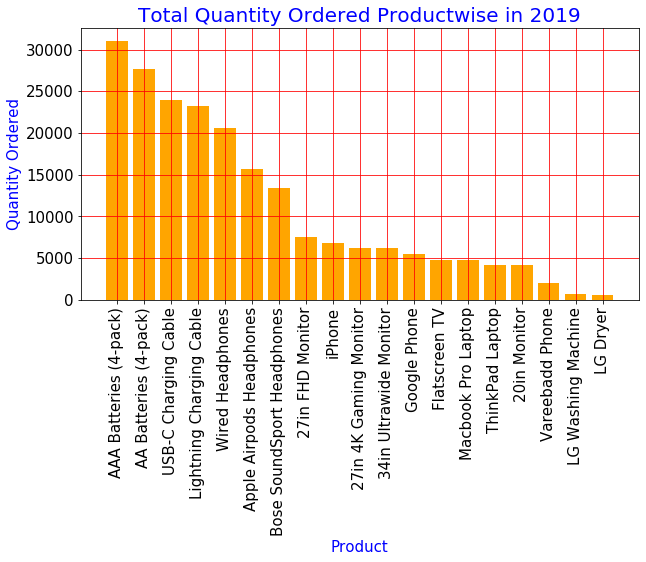

In [31]:
Total_Quantity_Ordered_ProductWise.sort_values(ascending= False, inplace=True)
x = Total_Quantity_Ordered_ProductWise.index
y = Total_Quantity_Ordered_ProductWise.values

fig = plt.figure(figsize=(10,5))
plt.title('Total Quantity Ordered Productwise in 2019', size = 20, color='blue')
plt.bar(x,y,color='orange')
plt.xticks(x,rotation='vertical',size=15)
plt.yticks(size=15)
plt.xlabel('Product',color='blue', size=15)
plt.ylabel('Quantity Ordered',color='blue', size=15)
plt.grid(b=True, axis='both',which='both',color='r')
plt.show()

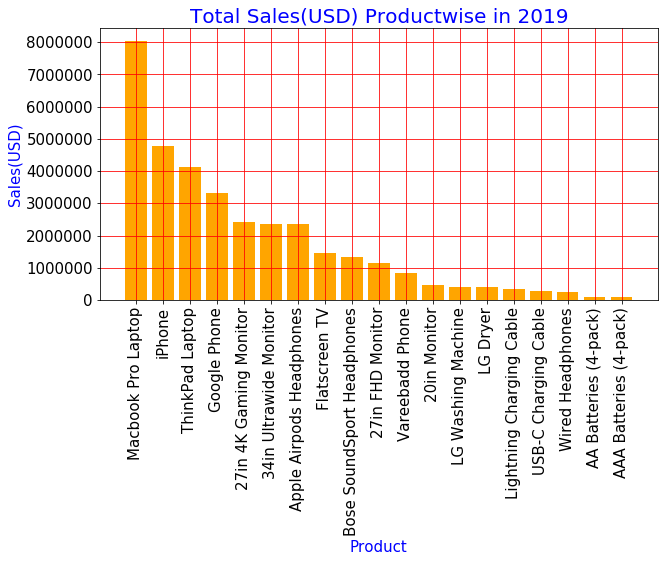

In [32]:
Total_Sales_ProductWise.sort_values(ascending= False, inplace=True)
x = Total_Sales_ProductWise.index
y = Total_Sales_ProductWise.values

fig = plt.figure(figsize=(10,5))
plt.title('Total Sales(USD) Productwise in 2019', size = 20, color='blue')
plt.bar(x,y,color='orange')
plt.xticks(x,rotation='vertical',size=15)
plt.yticks(size=15)
plt.xlabel('Product',color='blue', size=15)
plt.ylabel('Sales(USD)',color='blue', size=15)
plt.grid(b=True, axis='both',which='both',color='red')
plt.show()

In [33]:
clean1_data.groupby('Product')['Price Each'].unique().sort_values(ascending = False)

Product
Macbook Pro Laptop            [1700.0]
ThinkPad Laptop               [999.99]
iPhone                         [700.0]
LG Dryer                       [600.0]
LG Washing Machine             [600.0]
Google Phone                   [600.0]
Vareebadd Phone                [400.0]
27in 4K Gaming Monitor        [389.99]
34in Ultrawide Monitor        [379.99]
Flatscreen TV                  [300.0]
Apple Airpods Headphones       [150.0]
27in FHD Monitor              [149.99]
20in Monitor                  [109.99]
Bose SoundSport Headphones     [99.99]
Lightning Charging Cable       [14.95]
Wired Headphones               [11.99]
USB-C Charging Cable           [11.95]
AA Batteries (4-pack)           [3.84]
AAA Batteries (4-pack)          [2.99]
Name: Price Each, dtype: object

    Interesting point to note that the top five products 

   AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable,  WiredHeadphones

    that were sold in highest numbers (quantity)
    feature in the bottom five when it comes to total sales! This can be attributed to their relatively marginal
    price compared to products like 

Macbook Pro Laptop, iPhone, ThinkPad Laptop 
    
    that top the total sales chart.

In [34]:
clean1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Month             185950 non-null  int64  
 5   Day               185950 non-null  int64  
 6   Hour              185950 non-null  int64  
 7   Total             185950 non-null  float64
 8   Address           185950 non-null  object 
 9   City              185950 non-null  object 
 10  State             185950 non-null  object 
 11  Pin               185950 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.4+ MB
